## About Dataset
* [Kaggle link](https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors)
* [Fred Link - Target Value](https://fred.stlouisfed.org/series/CSUSHPISA)

Factors Affecting House Prices in Cyprus: 1988-2008 by Panos Pashardes & Christos S. Savva. This research paper is extremely informative and covers a lot of details regarding the macroeconomics involved in real estate market. So I would recommend you all to go through it once.

*   Macroeconomic factors with quarterly, monthly frequencies.
*   Microeconomic factors such as house type, age, location, size , facilities, view, disability functions, region, house prices, etc.


### [Google Drive](https://drive.google.com/drive/folders/1vuvmMxj8oTmNjxcZ0EpzSblUespzof-l) for the files related to the assignment

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data PreProcessing and EDA

In [99]:
#/content/drive/MyDrive/Internship/HOME_LLC
MMF_Kaggle = pd.read_csv('/content/drive/MyDrive/Internship/HOME_LLC/UShousepricemarkerfactors_kaggle/Monthly_Macroeconomic_Factors.csv')
MMF2_Kaggle = pd.read_csv('/content/drive/MyDrive/Internship/HOME_LLC/UShousepricemarkerfactors_kaggle/Housing_Macroeconomic_Factors_US_(2).csv')
Targetvalue = pd.read_csv('/content/drive/MyDrive/Internship/HOME_LLC/house_prices.csv')

In [100]:
MMF_Kaggle

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
2,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
3,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
4,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1
...,...,...,...,...,...,...,...,...,...
418,2021-11-01,276.092,159.94283,117.26923,205122000.0,4.2,6.97022,3.0675,15470.8
419,2021-12-01,278.681,157.33822,117.62954,205119000.0,3.9,-1.19019,3.0980,15442.7
420,2022-01-01,282.060,158.10031,118.61934,207397000.0,4.0,-6.00027,3.4450,15163.5
421,2022-02-01,287.307,155.27345,119.70281,207396000.0,3.8,-2.29249,3.7625,15173.6


In [101]:
MMF2_Kaggle

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2022-01-01,284.767,332684,5.7,100.091744,3.4450,70.748899,1841.0,294.807,21.6593,97.49467,2.13,NaN
421,2022-02-01,290.371,332750,6.0,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,2.13,NaN
422,2022-03-01,296.496,332812,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,2022-04-01,301.704,332863,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
kaggl1 = pd.merge(MMF_Kaggle, MMF2_Kaggle, how='inner')
kgl2 = kaggl1.drop(['House_Price_Index','house_price_index'], axis=1)
kgl2['Date'] = pd.to_datetime(kgl2['Date'])
Targetvalue['DATE'] = pd.to_datetime(Targetvalue['DATE'])
kaggle1 = pd.merge(Targetvalue,kgl2, left_on='DATE', right_on='Date', how='outer')
kaggle = kaggle1.drop(['Date'],axis=1)
kaggle.rename(columns = {'CSUSHPISA':'House_Price_Index'}, inplace = True)
kaggle

,DATE,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5,241857.0,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1,1987-02-01,64.424,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1,242005.0,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
2,1987-03-01,64.735,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0,242166.0,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
3,1987-04-01,65.131,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2,242338.0,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
4,1987-05-01,65.563,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1,242516.0,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-02-01,296.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,2023-03-01,298.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,2023-04-01,300.214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
436,2023-05-01,302.657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Variables and Details


1.   House_Price_Index(Target value): House price change according to the index base period set
2.   Stock_Price_Index: Stock price change according to the index base period set .
3. Consumer_Price_Index: The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.
4. Population: Population of USA in thousands
5. Unemployment_Rate: Unemployment rate of USA in percentage.
6. Real_GDP: GDP with adjusted inflation
7. Mortgage_Rate: Interest charged on mortgages in percentage.
8. Real_Disposable_Income (Real Disposable Personal Income): Money left from salary after all the taxes are paid in billions
9. Inflation: Decline in purchasing power over time in percentage.




In [103]:
print(kaggle.head())
print(kaggle.info())
print(kaggle.describe())

        DATE  House_Price_Index  Stock_Price_Index  Consumer_Price_Index  \
0 1987-01-01             63.965           14.97068              46.91647   
1 1987-02-01             64.424           15.86818              47.08523   
2 1987-03-01             64.735           16.48206              47.29619   
3 1987-04-01             65.131           16.22884              47.54933   
4 1987-05-01             65.563           16.14232              47.71810   

    Population  Unemployment_Rate  Real_GDP  Mortgage_Rate  \
0  153968000.0                6.6   2.41735         9.2040   
1  154123000.0                6.6   4.57724         9.0825   
2  154229000.0                6.6   3.87276         9.0350   
3  154362000.0                6.3   4.83973         9.8325   
4  154490000.0                6.3   4.51565        10.5960   

   Real_Disposable_Income  population  house_supply        gdp  mortgage_rate  \
0                  6159.5    241857.0           6.0  99.902813         9.2040   
1       

## Handeling Missing Values



Missing values in these columns can be filled using interpolation. Since these columns represent time-series data, interpolation helps estimate values based on the trend in adjacent time points.

In [104]:
kaggle['Stock_Price_Index'].interpolate(method='linear', inplace=True)
kaggle['Consumer_Price_Index'].interpolate(method='linear', inplace=True)

Since they are economic indicators, it's reasonable to assume that these values remain relatively constant over short time intervals.

In [105]:
kaggle['gdp'].fillna(method='ffill', inplace=True)
kaggle['mortgage_rate'].fillna(method='ffill', inplace=True)

These columns can also be filled using forward fill. Economic indicators tend to have consistent values over short periods.

In [106]:
kaggle['employment_rate'].fillna(method='ffill', inplace=True)
kaggle['permit_new'].fillna(method='ffill', inplace=True)
kaggle['ppi_res'].fillna(method='ffill', inplace=True)
kaggle['m3'].fillna(method='ffill', inplace=True)
kaggle['cci'].fillna(method='ffill', inplace=True)

These columns have missing values starting from a specific date (1992). You can fill the missing values with 0 before that date and forward fill after 1992, assuming that before 1992, these indicators were not recorded.

In [107]:
kaggle['delinquency_rate'].fillna(0, inplace=True)
kaggle['hcai'].fillna(0, inplace=True)

These columns can be filled with interpolation since they represent economic indicators, and the values are likely to follow a continuous trend.

In [108]:
kaggle['Real_GDP'].interpolate(method='linear', inplace=True)
kaggle['Real_Disposable_Income'].interpolate(method='linear', inplace=True)

The population numbers are unlikely to fluctuate significantly between consecutive time points.

In [109]:
kaggle['Population'].fillna(method='ffill', inplace=True)
kaggle['population'].fillna(method='ffill', inplace=True)

In [110]:
kaggle

,DATE,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5,241857.0,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,0.0,0.0
1,1987-02-01,64.424,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1,242005.0,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,0.0,0.0
2,1987-03-01,64.735,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0,242166.0,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,0.0,0.0
3,1987-04-01,65.131,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2,242338.0,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,0.0,0.0
4,1987-05-01,65.563,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1,242516.0,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-02-01,296.958,152.95571,121.30100,207331000.0,NaN,3.71768,NaN,15119.6,332812.0,NaN,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
434,2023-03-01,298.210,152.95571,121.30100,207331000.0,NaN,3.71768,NaN,15119.6,332812.0,NaN,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
435,2023-04-01,300.214,152.95571,121.30100,207331000.0,NaN,3.71768,NaN,15119.6,332812.0,NaN,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
436,2023-05-01,302.657,152.95571,121.30100,207331000.0,NaN,3.71768,NaN,15119.6,332812.0,NaN,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0


In [111]:
kaggle['Unemployment_Rate'].fillna(kaggle['Unemployment_Rate'].mean(), inplace=True)
kaggle['Mortgage_Rate'].fillna(kaggle['Mortgage_Rate'].mean(), inplace=True)
kaggle['house_supply'].fillna(kaggle['house_supply'].mean(), inplace=True)

# Model Building and Visualisation

In [112]:
kaggle.to_csv('./dataset.csv')

In [113]:
Hdata = pd.read_csv('./dataset.csv')
Hdata = Hdata.drop(Hdata.columns[0], axis=1)
Hdata

,DATE,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,14.97068,46.91647,153968000.0,6.600000,2.41735,9.204000,6159.5,241857.0,6.000000,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,0.0,0.0
1,1987-02-01,64.424,15.86818,47.08523,154123000.0,6.600000,4.57724,9.082500,6192.1,242005.0,6.200000,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,0.0,0.0
2,1987-03-01,64.735,16.48206,47.29619,154229000.0,6.600000,3.87276,9.035000,6200.0,242166.0,6.000000,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,0.0,0.0
3,1987-04-01,65.131,16.22884,47.54933,154362000.0,6.300000,4.83973,9.832500,5967.2,242338.0,6.000000,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,0.0,0.0
4,1987-05-01,65.563,16.14232,47.71810,154490000.0,6.300000,4.51565,10.596000,6209.1,242516.0,6.700000,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2023-02-01,296.958,152.95571,121.30100,207331000.0,5.860284,3.71768,6.323203,15119.6,332812.0,5.800709,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
434,2023-03-01,298.210,152.95571,121.30100,207331000.0,5.860284,3.71768,6.323203,15119.6,332812.0,5.800709,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
435,2023-04-01,300.214,152.95571,121.30100,207331000.0,5.860284,3.71768,6.323203,15119.6,332812.0,5.800709,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0
436,2023-05-01,302.657,152.95571,121.30100,207331000.0,5.860284,3.71768,6.323203,15119.6,332812.0,5.800709,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,0.0,0.0


In [114]:
nan_counts = Hdata.isna().sum()
print(nan_counts)

DATE                      0
House_Price_Index         0
Stock_Price_Index         0
Consumer_Price_Index      0
Population                0
Unemployment_Rate         0
Real_GDP                  0
Mortgage_Rate             0
Real_Disposable_Income    0
population                0
house_supply              0
gdp                       0
mortgage_rate             0
employment_rate           0
permit_new                0
ppi_res                   0
m3                        0
cci                       0
delinquency_rate          0
hcai                      0
dtype: int64


## Visualization

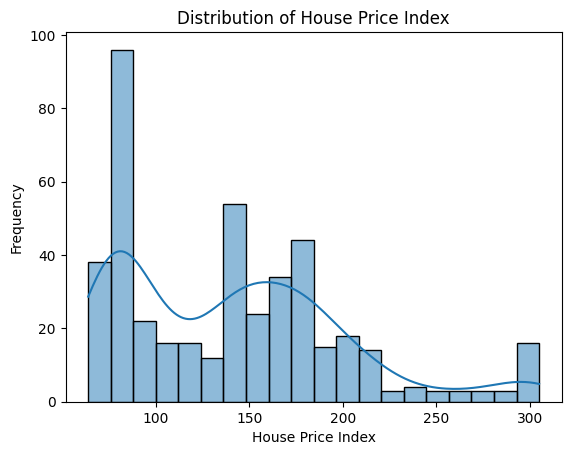

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for House_Price_Index (House_Price_Index)
sns.histplot(data=Hdata, x='House_Price_Index', bins=20, kde=True)
plt.xlabel('House Price Index')
plt.ylabel('Frequency')
plt.title('Distribution of House Price Index')
plt.show()


Based on the Above Plot we can see that Due to High House Prices in the US there has been a rapid decrease in the Frequency i  which the House is purchased

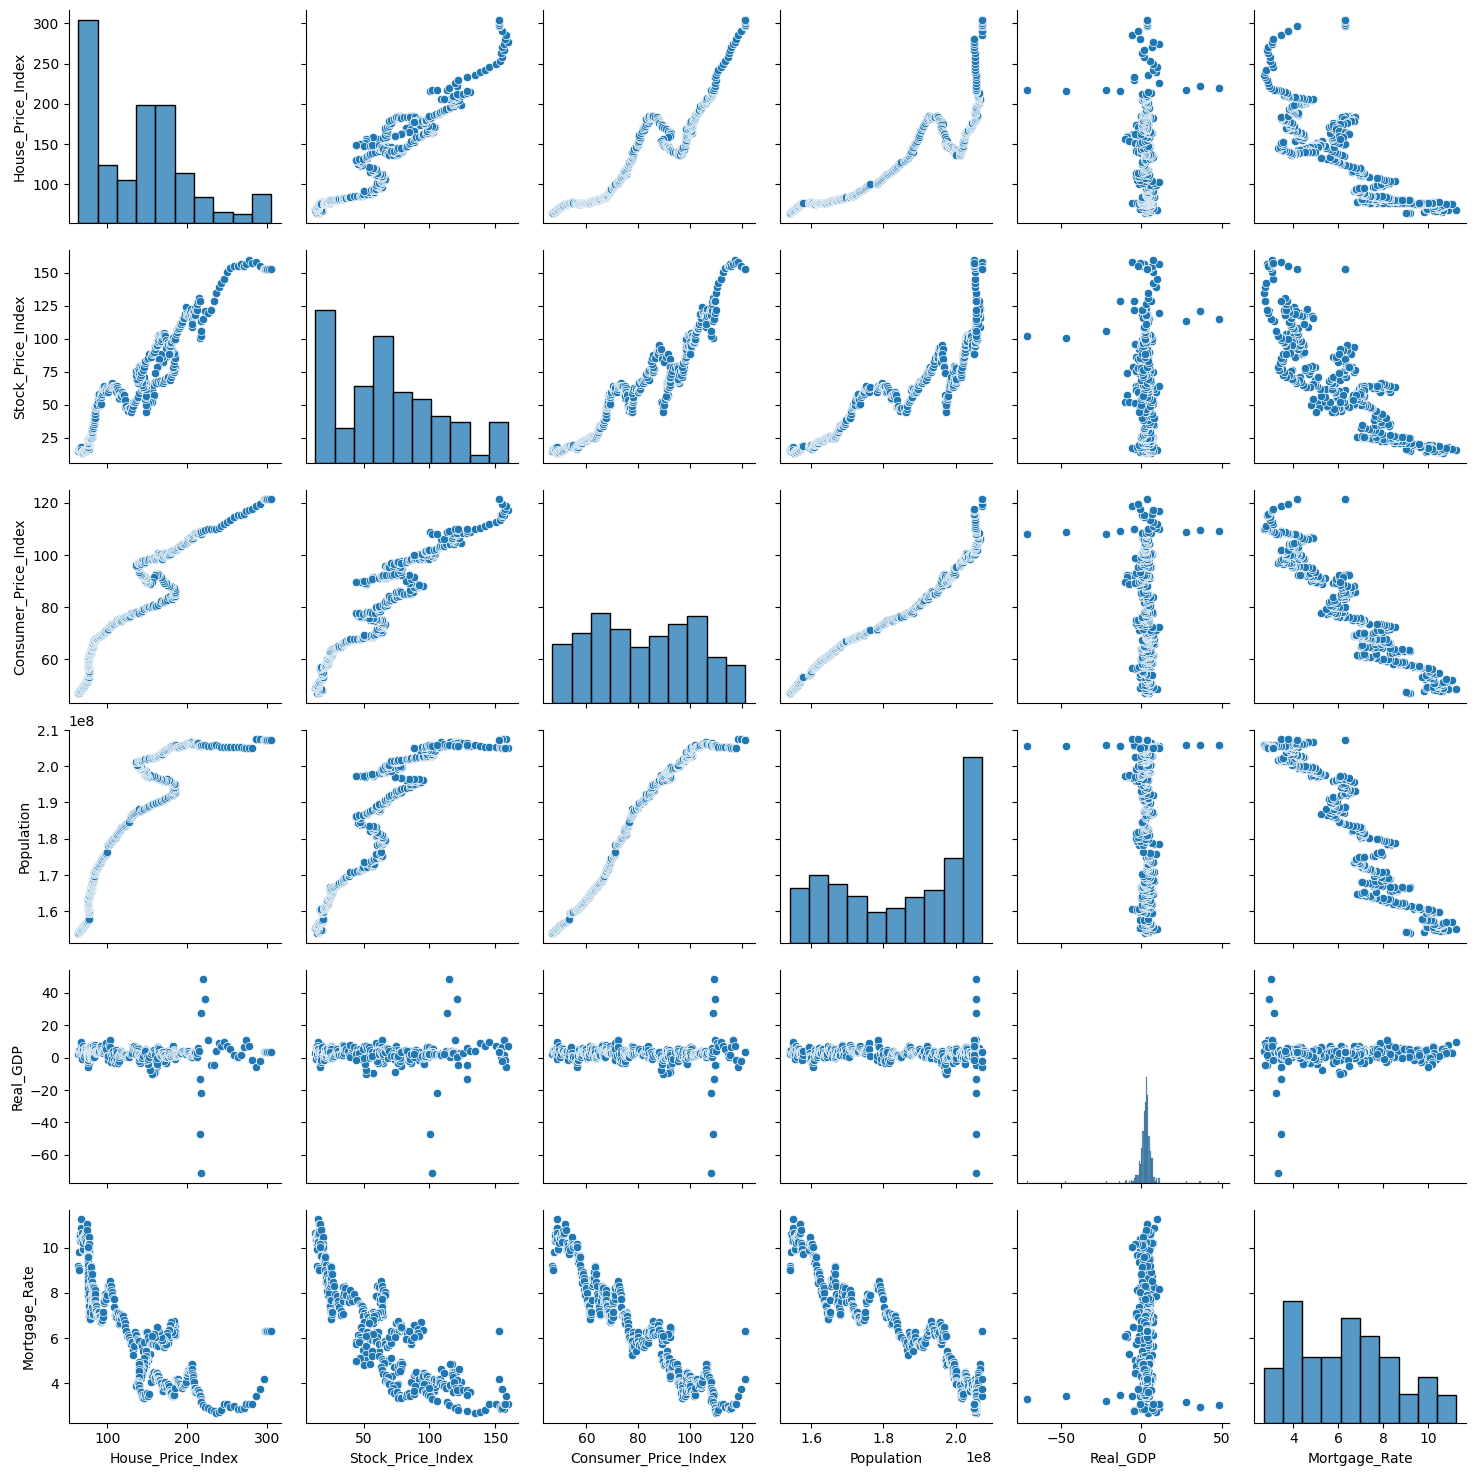

In [116]:
sns.pairplot(data=Hdata[['House_Price_Index','Stock_Price_Index', 'Consumer_Price_Index', 'Population','Real_GDP','Mortgage_Rate']])
plt.show()

### Insights from The Above Visualisation

*   The mortgage rate has been declining over the past 10 years. This is likely due to a number of factors, including low interest rates from the Federal Reserve and increased competition among mortgage lenders.
*   Real GDP has been growing steadily over the past 10 years. This is a positive sign for the economy, as it indicates that businesses are producing more goods and services and that consumers are spending more money.
* Population has been growing slowly over the past 10 years. This is likely due to a declining birth rate and an aging population.
* The CPI has been increasing gradually over the past 10 years. This indicates that inflation is slowly rising, which means that prices for goods and services are increasing.
* The stock price index has been rising sharply over the past 10 years. This is a sign of investor confidence in the economy.
* The house price index has been rising more rapidly than the CPI over the past 10 years. This suggests that housing is becoming more expensive, which could make it more difficult for people to afford to buy a home.



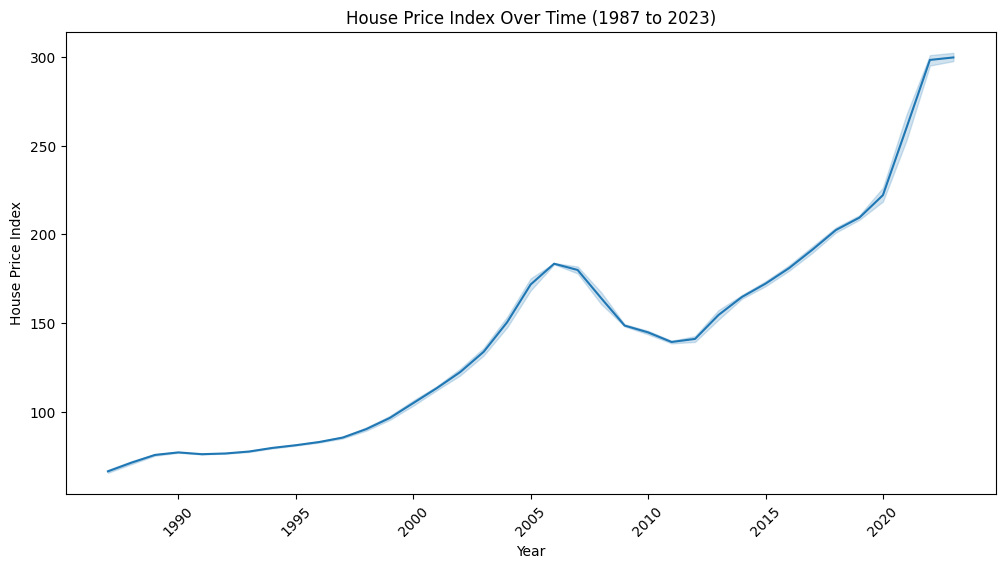

In [117]:


# Convert the 'DATE' column to datetime format
Hdata['DATE'] = pd.to_datetime(Hdata['DATE'])

# Extract the year from the 'DATE' column and create a new 'Year' column
Hdata['Year'] = Hdata['DATE'].dt.year

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hdata, x='Year', y='House_Price_Index')
plt.xlabel('Year')
plt.ylabel('House Price Index')
plt.title('House Price Index Over Time (1987 to 2023)')
plt.xticks(rotation=45)
plt.show()


In the Above Graph we can see how The price the houses have increased over the years

### Determining Corelation Between The features with a heat map

<ipython-input-118-f12b7643e36d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Hdata.corr()


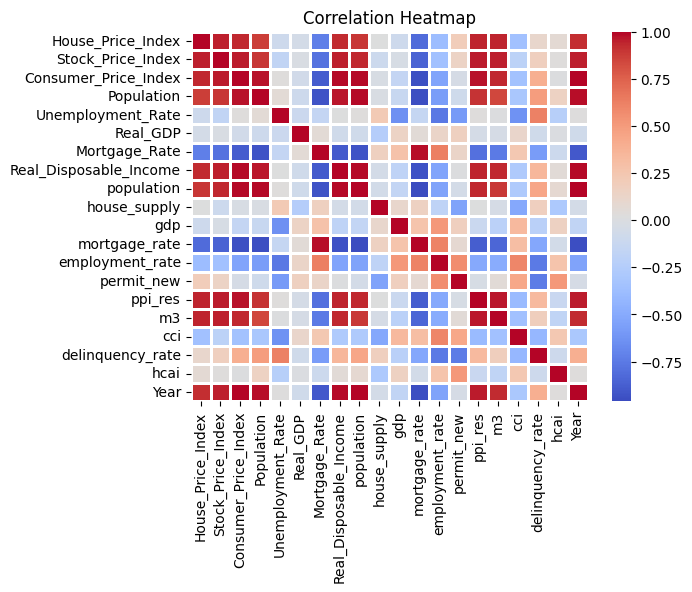

In [118]:
correlation_matrix = Hdata.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

Creating a Seperate Data Frame with highly coleated features to determine the factors the might influence the house prices of USA

In [119]:
import pandas as pd

correlation_matrix = Hdata.corr()
threshold = 0.75

highly_correlated_cols = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[(correlation_matrix[col] > threshold) & (correlation_matrix[col] < 1.0)]
    highly_correlated_cols.update(correlated_cols)

# Convert the set to a list
highly_correlated_cols = list(highly_correlated_cols)
highly_correlated_data = Hdata[highly_correlated_cols]
highly_correlated_data


<ipython-input-119-6e59f00da29c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Hdata.corr()


,mortgage_rate,House_Price_Index,Mortgage_Rate,Consumer_Price_Index,Year,Real_Disposable_Income,m3,ppi_res,population,Population,Stock_Price_Index
0,9.2040,63.965,9.204000,46.91647,1987,6159.5,2.7439,100.000,241857.0,153968000.0,14.97068
1,9.0825,64.424,9.082500,47.08523,1987,6192.1,2.7475,100.400,242005.0,154123000.0,15.86818
2,9.0350,64.735,9.035000,47.29619,1987,6200.0,2.7537,100.700,242166.0,154229000.0,16.48206
3,9.8325,65.131,9.832500,47.54933,1987,5967.2,2.7677,101.100,242338.0,154362000.0,16.22884
4,10.5960,65.563,10.596000,47.71810,1987,6209.1,2.7729,101.300,242516.0,154490000.0,16.14232
...,...,...,...,...,...,...,...,...,...,...,...
433,3.7625,296.958,6.323203,121.30100,2023,15119.6,21.7497,303.546,332812.0,207331000.0,152.95571
434,3.7625,298.210,6.323203,121.30100,2023,15119.6,21.7497,303.546,332812.0,207331000.0,152.95571
435,3.7625,300.214,6.323203,121.30100,2023,15119.6,21.7497,303.546,332812.0,207331000.0,152.95571
436,3.7625,302.657,6.323203,121.30100,2023,15119.6,21.7497,303.546,332812.0,207331000.0,152.95571


In [120]:
 Corelation = highly_correlated_data.drop(['Population', 'Mortgage_Rate'], axis=1)
 Corelation

,mortgage_rate,House_Price_Index,Consumer_Price_Index,Year,Real_Disposable_Income,m3,ppi_res,population,Stock_Price_Index
0,9.2040,63.965,46.91647,1987,6159.5,2.7439,100.000,241857.0,14.97068
1,9.0825,64.424,47.08523,1987,6192.1,2.7475,100.400,242005.0,15.86818
2,9.0350,64.735,47.29619,1987,6200.0,2.7537,100.700,242166.0,16.48206
3,9.8325,65.131,47.54933,1987,5967.2,2.7677,101.100,242338.0,16.22884
4,10.5960,65.563,47.71810,1987,6209.1,2.7729,101.300,242516.0,16.14232
...,...,...,...,...,...,...,...,...,...
433,3.7625,296.958,121.30100,2023,15119.6,21.7497,303.546,332812.0,152.95571
434,3.7625,298.210,121.30100,2023,15119.6,21.7497,303.546,332812.0,152.95571
435,3.7625,300.214,121.30100,2023,15119.6,21.7497,303.546,332812.0,152.95571
436,3.7625,302.657,121.30100,2023,15119.6,21.7497,303.546,332812.0,152.95571


### Highly Corelated Features

The might be possibley influencing Changes in House Prices

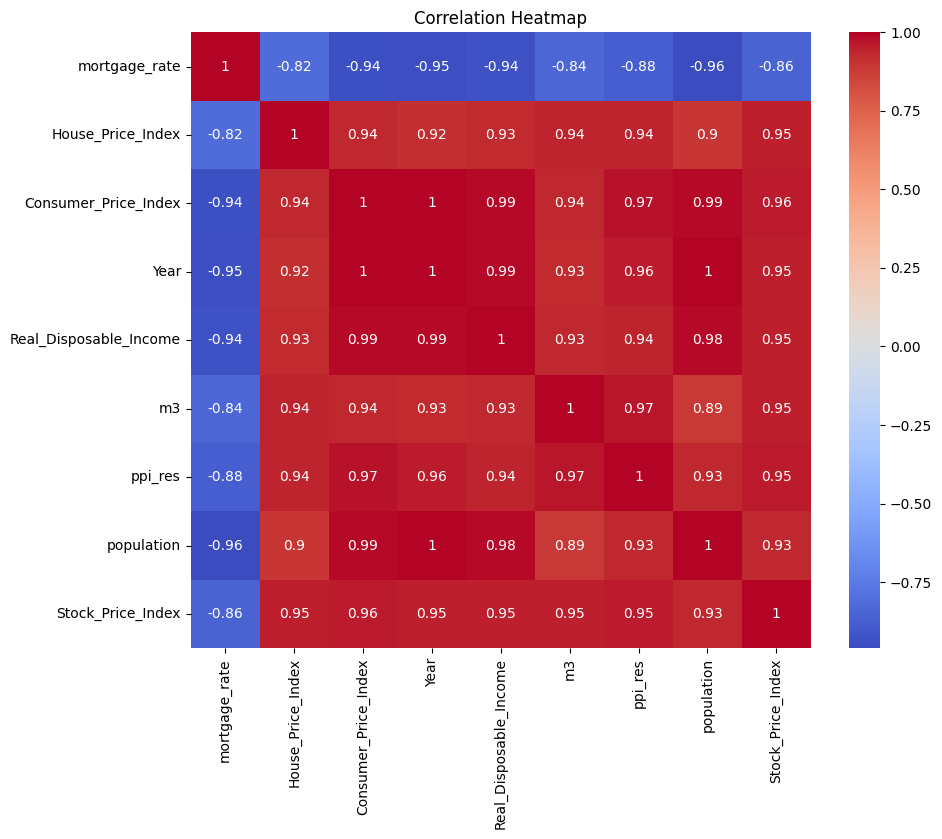

In [121]:
import numpy as np
corr_matrix = Corelation.corr()

# # Create a mask for the upper triangle of the correlation matrix
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [122]:
Hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    438 non-null    datetime64[ns]
 1   House_Price_Index       438 non-null    float64       
 2   Stock_Price_Index       438 non-null    float64       
 3   Consumer_Price_Index    438 non-null    float64       
 4   Population              438 non-null    float64       
 5   Unemployment_Rate       438 non-null    float64       
 6   Real_GDP                438 non-null    float64       
 7   Mortgage_Rate           438 non-null    float64       
 8   Real_Disposable_Income  438 non-null    float64       
 9   population              438 non-null    float64       
 10  house_supply            438 non-null    float64       
 11  gdp                     438 non-null    float64       
 12  mortgage_rate           438 non-null    float64   

## Model Training

**Linear Regression Model:**

- **Type of Model:** Linear regression is a supervised machine learning algorithm used for regression tasks, where the goal is to predict a continuous numerical output (in this case, house prices).

- **Nature of the Model:** Linear regression models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. In simple linear regression, there is only one independent variable, while multiple independent variables can be used in multiple linear regression.



In [123]:

data = Hdata.drop(['DATE','Year'], axis=1)

X = data.drop(['House_Price_Index'], axis=1)
y = data['House_Price_Index']

# training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error: 16.90433391283075
R-squared: 0.9964285346603687
Coefficients: [ 2.13596810e-01  2.63365034e+00  4.32942528e-06  2.59128276e+00
  2.85599615e-02 -2.39955145e+00 -1.10334907e-03 -3.75069943e-03
  4.26458684e+00 -7.02366450e-01  3.82739120e-01  1.32288669e+00
  1.98316241e-02  9.17030968e-02  5.47148408e+00  1.12275682e+00
 -3.11599366e+00  4.46848115e-01]
Intercept: -26.882228464863232


## Model Summary

In [124]:
import statsmodels.api as sm

data = Hdata

X = data[['Consumer_Price_Index', 'Year', 'Real_Disposable_Income', 'm3', 'ppi_res', 'population', 'Stock_Price_Index']]

X = sm.add_constant(X)

y = data['House_Price_Index']


model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      House_Price_Index   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1125.
Date:                Wed, 06 Sep 2023   Prob (F-statistic):          6.58e-272
Time:                        12:53:19   Log-Likelihood:                -1764.5
No. Observations:                 438   AIC:                             3545.
Df Residuals:                     430   BIC:                             3578.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4750

# Conclution Based on The Output(Model Summary)

**Report: Factors Influencing US Home Prices Nationally**

*Prepared by: Akash Kashyap*


**As an executive summary,**

Across this work, i analyse the elements that, on a national level, have an impact on the costs of homes in the United States. We seek to identify the crucial elements—primarily those associated with supply and demand—that play a key role in determining the dynamics of the housing market through meticulous regression analysis. Our ultimate objective is to unravel the complex connections between these variables and the variations in home values.

**Methodology:**



This approach uses a dataset that covers the years 1987 to 2023 and focuses on the use of Ordinary Least Squares (OLS) regression analysis. The House_Price_Index is the key dependent variable in our model. a comprehensive representation of the national housing market's price trends. We have meticulously considered several independent variables that are likely to exert influence on house prices. Our analytical spectrum encompasses:

1. **Consumer Price Index (CPI):** A crucial measure of inflation, CPI stands as a potential factor that can sway consumer purchasing power and thereby impact housing prices.

2. **Year:** To account for temporal trends that might bear upon the housing market over time.

3. **Real Disposable Income:** A critical metric reflecting the income available to consumers once adjusted for inflation.

4. **M3:** A significant gauge of the money supply in the economy, serving as an indicator of liquidity.

5. **PPI (Producer Price Index) Residuals:** An indicator that underscores the inflationary forces at play within the production process.

6. **Population:** A variable that helps us gauge demographic changes and shifts in housing demand.

7. **Stock Price Index:** Employed as a proxy for the overall economic performance.

**Key Findings:**

Our analytical journey yields the following critical insights:

1. **R-squared Value:** Our regression model attains an impressive R-squared value of 0.948, signifying that approximately 94.8% of the variance in house prices can be explained by the carefully selected independent variables.

2. **Significant Variables:** Among the variables under scrutiny, several stand out as statistically significant influencers of house prices:
   - **Consumer Price Index (CPI):** A boost in CPI corresponds to higher house prices.
   - **Real Disposable Income:** Elevated real disposable income aligns positively with house prices.
   - **PPI Residuals:** As an indicator of inflationary pressures, this variable exhibits a negative impact on house prices.
   - **Population:** The increase in population is associated with a tendency for house prices to decrease.
   - **Stock Price Index:** Elevated stock prices are linked to higher house prices.

3. **Year:** Although we included the year in our model, it was not found to be statistically significant, suggesting that time-related trends do not exert a substantial influence on house prices.

**Discussion:**

Our findings illuminate the critical supply and demand factors that cast their long shadows over home prices in the United States. Notably, factors entailing inflation, consumer income, and economic performance hold significant sway over the housing market's dynamics.

**Recommendations:**

Drawing from our analysis, we advocate for a vigilant monitoring of key economic indicators such as CPI, real disposable income, PPI residuals, population trends, and the stock price index. Additionally, it is imperative to embark on further investigations into the underlying reasons behind population-driven trends in the housing market.

**Limitations:**

- Our analysis operates under the assumption of a linear relationship between independent variables and house prices, which might not capture the full spectrum of nuances in the housing market.
- The presence of multicollinearity among independent variables, indicated by a high condition number, warrants further scrutiny.
- Future studies should delve into the normality of residuals and the presence of autocorrelation.

**Conclusion:**

This report, authored with the utmost care and dedication, unlocks the core supply and demand factors that hold dominion over US home prices at the national level. With a firm grasp of the intricate relationships between these variables, policymakers, economists, and real estate experts can make informed decisions to navigate the ever-evolving housing landscape.
